In [1]:
import numpy as np
from numpy import ma
import netCDF4 as ncdf
import matplotlib.pyplot as plt
import xarray as xr
#%matplotlib notebook

In [2]:
dataDIR = 'pyOM.cdf'
DS = xr.open_dataset(dataDIR)
DS

<xarray.Dataset>
Dimensions:            (Time: 60, xt: 60, xu: 60, yt: 60, yu: 60, zt: 20, zu: 20)
Coordinates:
  * xt                 (xt) float32 -5e-06 5e-06 1.5e-05 ... 0.000575 0.000585
  * xu                 (xu) float32 0.0 1e-05 2e-05 ... 0.00057 0.00058 0.00059
  * yt                 (yt) float32 -5e-06 5e-06 1.5e-05 ... 0.000575 0.000585
  * yu                 (yu) float32 0.0 1e-05 2e-05 ... 0.00057 0.00058 0.00059
  * Time               (Time) float32 0.0 1.157e-05 ... 0.0006713 0.0006829
  * zt                 (zt) float32 -0.195 -0.185 -0.175 ... -0.015 -0.005
  * zu                 (zu) float32 -0.19 -0.18 -0.17 -0.16 ... -0.02 -0.01 0.0
Data variables: (12/14)
    ht                 (yt, xt) float32 ...
    temp               (Time, zt, yt, xt) float32 ...
    salt               (Time, zt, yt, xt) float32 ...
    u                  (Time, zt, yt, xu) float32 ...
    v                  (Time, zt, yu, xt) float32 ...
    w                  (Time, zu, yt, xt) float32 ...
    ...                 ...
    p_hydro            (Time, zt, yt, xt) float32 ...
    p_non_hydro        (Time, zt, yt, xt) float32 ...
    forc_temp_surface  (Time, yt, xt) float32 ...
    forc_salt_surface  (Time, yt, xt) float32 ...
    taux               (Time, yt, xu) float32 ...
    tauy               (Time, yu, xt) float32 ...

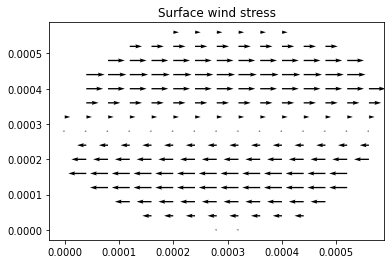

In [3]:
fig, ax = plt.subplots()
x,y = np.meshgrid(DS.xu,DS.yu)
q=ax.quiver(x[::4,::4],y[::4,::4],DS['taux'][0,::4,::4],DS['tauy'][0,::4,::4])
plt.title('Surface wind stress')
plt.show()

In [4]:
DS['u']

<xarray.DataArray 'u' (Time: 60, zt: 20, yt: 60, xu: 60)>
[4320000 values with dtype=float32]
Coordinates:
  * xu       (xu) float32 0.0 1e-05 2e-05 3e-05 ... 0.00057 0.00058 0.00059
  * yt       (yt) float32 -5e-06 5e-06 1.5e-05 ... 0.000565 0.000575 0.000585
  * Time     (Time) float32 0.0 1.157e-05 2.315e-05 ... 0.0006713 0.0006829
  * zt       (zt) float32 -0.195 -0.185 -0.175 -0.165 ... -0.025 -0.015 -0.005
Attributes:
    long_name:  Zonal velocity                  
    units:      m/s

/var/folders/06/6y4mw40d4sn25y3mth8c0y700000gn/T/ipykernel_4953/2951703083.py:6: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


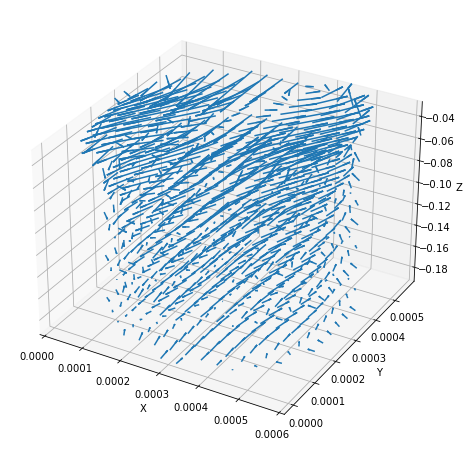

In [5]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection='3d')

# Make the grid
x, y, z = np.meshgrid(DS.xu,DS.yu,DS.zu)
# Make the drection data for the arrows
u = DS['u'][2,:,:,:].transpose()
v = DS['v'][2,:,:,:].transpose()
w = DS['w'][2,:,:,:].transpose()

ax.quiver(x[::4,::4,::4], y[::4,::4,::4], z[::4,::4,::4], u[::4,::4,::4], v[::4,::4,::4], w[::4,::4,::4],length=3, normalize=False)
ax.set_xlim3d([0.0, 0.0006])
ax.set_xlabel('X')
#ax.set_ylim3d([0.0, 0.0006])
ax.set_ylabel('Y')
#ax.set_zlim3d([-0.2, 0])
ax.set_zlabel('Z')

# ax.set_xlabel('Zonal distance [cm]') 
# ax.set_ylabel('Meridional distance [cm]') 
# ax.set_zlabel('Depth [cm]')

plt.show()

/var/folders/06/6y4mw40d4sn25y3mth8c0y700000gn/T/ipykernel_4953/3831309298.py:8: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


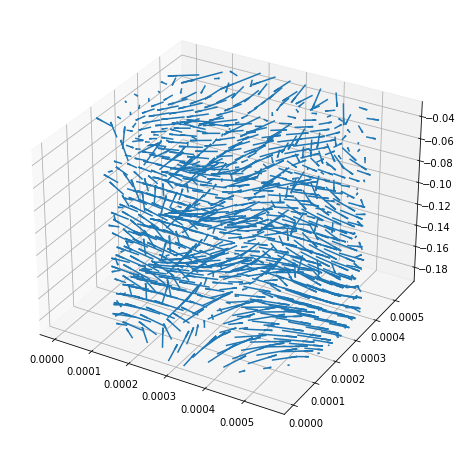

In [6]:
# %matplotlib notebook  # display gif
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection='3d')

def init(i):
    x, y, z = np.meshgrid(DS.xu,DS.yu,DS.zu)
    u = DS['u'][i,:,:,:].transpose()
    v = DS['v'][i,:,:,:].transpose()
    w = DS['w'][i,:,:,:].transpose()
    return x[::4,::4,::4],y[::4,::4,::4],z[::4,::4,::4],u[::4,::4,::4],v[::4,::4,::4],w[::4,::4,::4]
Q=ax.quiver(*init(0))

def update(i):
    global Q
    Q.remove()
    Q = ax.quiver(*init(i))

ani = FuncAnimation(fig,update,frames=np.arange(1, 8, 1),interval=1000)
ani.save("Ekman.gif",writer='pillow')
plt.show()

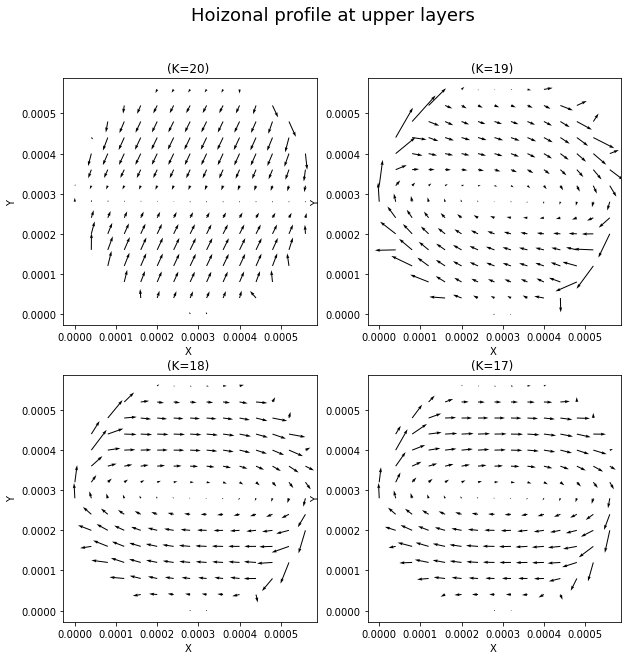

In [7]:

fig, ax = plt.subplots(2, 2,figsize=(10,10))
fig.suptitle('Hoizonal profile at upper layers',fontsize=18)
x,y = np.meshgrid(DS.xu,DS.yu)

time_idx=4

q=ax[0,0].quiver(x[::4,::4],y[::4,::4],DS['u'][time_idx,19,:,:][::4,::4],DS['v'][time_idx,19,:,:][::4,::4])
ax[0, 0].set_title('(K=20) ')

q=ax[0,1].quiver(x[::4,::4],y[::4,::4],DS['u'][time_idx,18,:,:][::4,::4],DS['v'][time_idx,18,:,:][::4,::4])
ax[0, 1].set_title('(K=19) ')

q=ax[1,0].quiver(x[::4,::4],y[::4,::4],DS['u'][time_idx,17,:,:][::4,::4],DS['v'][time_idx,17,:,:][::4,::4])
ax[1, 0].set_title('(K=18) ')

q=ax[1,1].quiver(x[::4,::4],y[::4,::4],DS['u'][time_idx,16,:,:][::4,::4],DS['v'][time_idx,16,:,:][::4,::4])
ax[1, 1].set_title('(K=17) ')

for ax in ax.flat:
    ax.set(xlabel='X ', ylabel='Y')

plt.show()



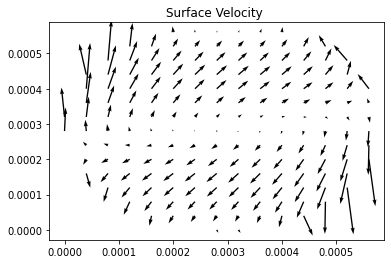

In [8]:
fig, ax = plt.subplots()
x,y = np.meshgrid(DS.xu,DS.yu)
q=ax.quiver(x[::4,::4],y[::4,::4],DS['u'][2,18,:,:][::4,::4],DS['v'][2,18,:,:][::4,::4])
plt.title('Surface Velocity ')
plt.show()

In [9]:
DS['u']

<xarray.DataArray 'u' (Time: 60, zt: 20, yt: 60, xu: 60)>
[4320000 values with dtype=float32]
Coordinates:
  * xu       (xu) float32 0.0 1e-05 2e-05 3e-05 ... 0.00057 0.00058 0.00059
  * yt       (yt) float32 -5e-06 5e-06 1.5e-05 ... 0.000565 0.000575 0.000585
  * Time     (Time) float32 0.0 1.157e-05 2.315e-05 ... 0.0006713 0.0006829
  * zt       (zt) float32 -0.195 -0.185 -0.175 -0.165 ... -0.025 -0.015 -0.005
Attributes:
    long_name:  Zonal velocity                  
    units:      m/s

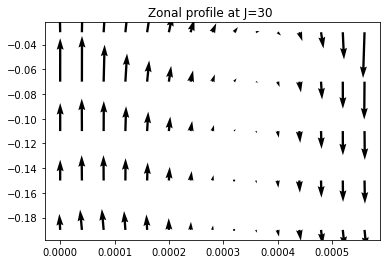

In [10]:
fig, ax = plt.subplots()
x,z = np.meshgrid(DS.xu,DS.zu)
q=ax.quiver(x[::4,::4],z[::4,::4],DS['u'][2,:,30,:][::4,::4],DS['v'][2,:,30,:][::4,::4])
plt.title('Zonal profile at J=30 ')
plt.show()

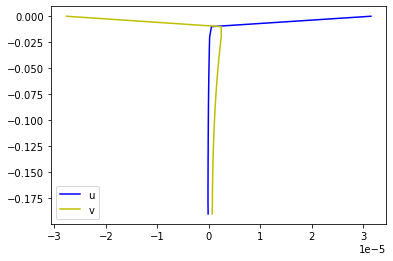

In [11]:
plt.plot(DS['u'][1,:,30,30],DS.zu,color='b',label='u')
plt.plot(DS['v'][1,:,30,30],DS.zu,color='y',label='v')
plt.legend()

/var/folders/06/6y4mw40d4sn25y3mth8c0y700000gn/T/ipykernel_4953/3407978793.py:6: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


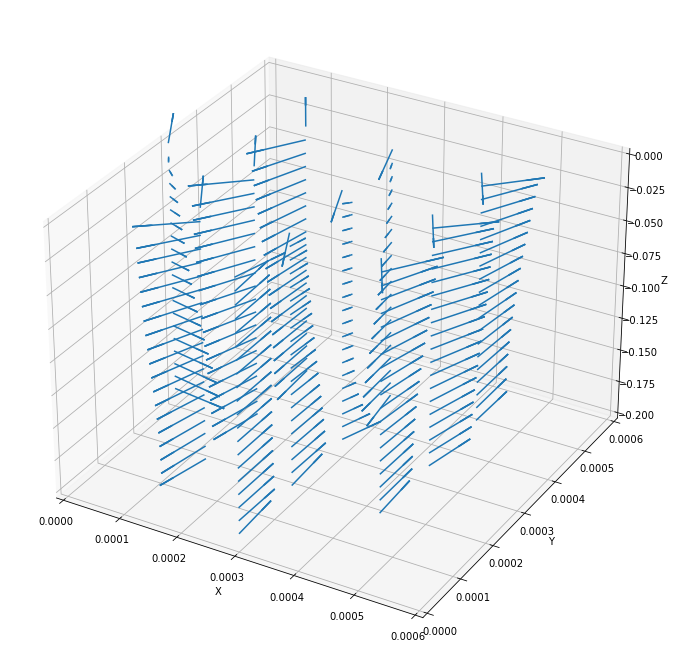

In [12]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(12, 12))
ax = fig.gca(projection='3d')

# Make the grid
x, y, z = np.meshgrid(DS.xu,DS.yu,DS.zu)
# Make the direction data for the arrows
u = DS['u'][2,:,:,:].transpose()
v = DS['v'][2,:,:,:].transpose()
w = DS['w'][2,:,:,:].transpose()

ax.quiver(x[::15,::15,:], y[::15,::15,:], z[::15,::15,:], u[::15,::15,:], v[::15,::15,:], w[::15,::15,:], length=0.0001, normalize=True)
ax.set_xlim3d([0.0, 0.0006])
ax.set_xlabel('X')
ax.set_ylim3d([0.0, 0.0006])
ax.set_ylabel('Y')
ax.set_zlim3d([-0.2, 0])
ax.set_zlabel('Z')

plt.show()

In [13]:
K=2e-6
rounds=5 # 5 rpm
tank_omega=2*np.pi*rounds/60
f=2*tank_omega
D = np.pi * np.sqrt(2 * K / f) #Ekman depth

In [14]:
D

0.00613996024767893

In [15]:
f

1.0471975511965976

In [16]:
tau=1.25*2.6*10**(-3)*0.01*0.01
tau

3.2500000000000006e-07